Eniac's website team settled on 4 different new versions to test against the original “Interact” button:

Connect

Learn

Help

Services


The metrics that were deemed relevant enough to be tracked were the following:

Click-through rate (CTR) for the homepage : Amount of clicks on the button divided by the total visits to the page.

Drop-off rate for the category pages: Percentage of visitors who exit the site from a given category page (like Interact, Connect, Learn, etc.) without exploring any of its subpages. A lower drop-off rate is preferable

Homepage-return rate for the category pages : Measures how often users who visit specific category pages (Interact, Connect, Learn, etc.) from the library homepage end up returning to the homepage. If they frequently return to the homepage,  Ideally, we want to minimize the homepage-return rate, which would indicate that users are finding what they need on the first try.

*  it was decided that for a version to be considered superior, a minimum increase in click-through rate of 30% had to be detected.


* The desired Statistical Significance was chosen to be 90%

* Currently, the CTR for Interact sits at around 2%, and the page has around 1650 visitors every day.

* The length of the experiment was established at 21 days:

#  import all library

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

# import all the data

In [12]:
interact_df =pd.read_csv('/content/drive/My Drive/Element list Homepage Version 1 - Interact, 5-29-2013.csv')
connect_df =pd.read_csv('/content/drive/My Drive/Element list Homepage Version 2 - Connect, 5-29-2013.csv')
learn_df =pd.read_csv('/content/drive/My Drive/Element list Homepage Version 3 - Learn, 5-29-2013.csv')
help_df =pd.read_csv('/content/drive/My Drive/Element list Homepage Version 4 - Help, 5-29-2013.csv')
services_df =pd.read_csv('/content/drive/My Drive/Element list Homepage Version 5 - Services, 5-29-2013.csv')

What was the click-through rate for each version?

Which version was the winner?

Do the results seem conclusive?

# export the data click and no cklick for each version


In [16]:
%load_ext google.colab.data_table

Exctract Click data


In [39]:
interact_clicks = int(interact_df.loc[interact_df["Name"]=="INTERACT", "No. clicks"])
connect_clicks = int(connect_df.loc[connect_df["Name"]=="CONNECT", "No. clicks"])
learn_clicks = int(learn_df.loc[learn_df["Name"]=="LEARN", "No. clicks"])
help_clicks = int(help_df.loc[help_df["Name"]=="HELP", "No. clicks"])
services_clicks = int(services_df.loc[services_df["Name"]=="SERVICES", "No. clicks"])

interact_clicks, connect_clicks, learn_clicks, help_clicks, services_clicks


(42, 53, 21, 38, 45)

total number of visitors

In [44]:
interact_visits = 10283
connect_visits = 2742
learn_visits = 2747
help_visits = 3180
services_visits = 2064

interact_visits, connect_visits, learn_visits, help_visits,services_visits

(10283, 2742, 2747, 3180, 2064)

Number of visitor who didn't click

In [35]:
interact_no_click = interact_visits - interact_clicks
connect_no_click = connect_visits - connect_clicks
learn_no_click = learn_visits - learn_clicks
help_no_click = help_visits - help_clicks
services_no_click = services_visits - services_clicks

Create the contengency table

In [38]:
clicks = [interact_clicks, connect_clicks, learn_clicks, help_clicks, services_clicks]
no_clicks = [interact_no_click, connect_no_click, learn_no_click, help_no_click, services_no_click]

observed_results = pd.DataFrame(data = [clicks, no_clicks],
                                columns = ["Interact", "Connect", "Learn", "Help", "Services"],
                                index = ["Click", "No_click"])

observed_results

,Interact,Connect,Learn,Help,Services
Click,42,53,21,38,45
No_click,10241,2689,2726,3142,2019


# State the Null Hypothesis and the Alternative Hypothesis.


Null Hypothesis: all versions have the same CTR.

Alternative Hypothesis: there is a difference in the CTR for the different versions.

# Set Variables alpha

In [31]:
alpha = 0.1

# Calculate the test result

In [28]:
chisq, pvalue, df, expected = stats.chi2_contingency(observed_results)

In [29]:
pvalue

4.852334301093838e-20

In [32]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


This means that at least one of the five different versions performed significantly better or worse than the others.

# Chi Squared pairwise Test

Calculate the conversion rate for eatch options

In [52]:
import pandas as pd


observation = pd.DataFrame({
    'version': ["Interact", "Connect", "Learn", "Help", "Services"],
    'click': [42, 53, 21, 38, 45],
    'no_click': [10283, 2742, 2747, 3180, 2064]
})

# Calculate conversion rate for each version
observation['conversion_rate'] = observation['click'] / observation['no_click']

observation.sort_values("conversion_rate", ascending= False)
# Print the results
for version, conversion_rate in zip(observation['version'], observation['conversion_rate']):
    print(f"Version {version} conversion rate: {conversion_rate:.2%}")



Version Interact conversion rate: 0.41%
Version Connect conversion rate: 1.93%
Version Learn conversion rate: 0.76%
Version Help conversion rate: 1.19%
Version Services conversion rate: 2.18%


In [ ]:
# click-through rates
interact_ctr = interact_clicks / interact_visits
connect_ctr = connect_clicks / connect_visits
learn_ctr = learn_clicks / learn_visits
help_ctr = help_clicks / help_visits
services_ctr = services_clicks / services_visits

# display as DataFrame
rates = [interact_ctr, connect_ctr, learn_ctr, help_ctr, services_ctr]
names = ["Interact", "Connect", "Learn", "Help", "Services"]

ctr_df = pd.DataFrame({"rates": rates, "names": names})
ctr_df.sort_values("rates", ascending=False)

Post_hoc Test

In [57]:
possible_combinations = 10
alpha_post_hoc = alpha / possible_combinations
alpha_post_hoc

0.01

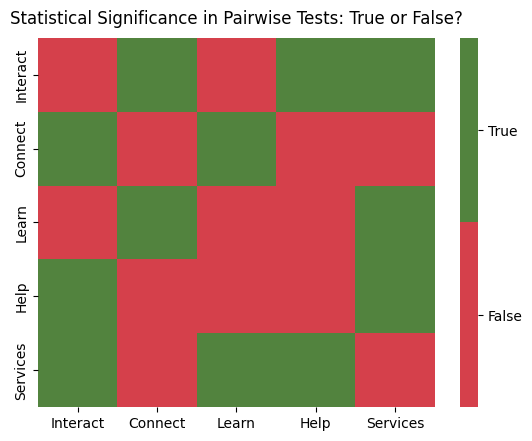

In [58]:
# empty dictionary to fill with our results
stat_significant_dict = {
                        "Interact": [],
                        "Connect": [],
                        "Learn": [],
                        "Help": [],
                        "Services": []
                         }

# compare each version to each other version
for i in observed_results.columns:
  for j in observed_results.columns:
    # use scipy to find the p-value of each pair
    chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [i, j]], correction=False)
    # boolean: if the p-value is lower than alpha, our result is statistically significant
    stat_significant_dict[i].append(pvalue < alpha_post_hoc)

# create a DataFrame of results
stat_significant_df = pd.DataFrame(stat_significant_dict,
                                   index=observed_results.columns)

# create a heatmap from the DataFrame & red/green colour palette
red_green_palette = sns.diverging_palette(10, 120, n=2, s=70, l=50)
ax = sns.heatmap(stat_significant_df, cmap=red_green_palette)

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['False', 'True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10);

In [60]:
stat_significant_dict

{'Interact': [False, True, False, True, True],
 'Connect': [True, False, True, False, False],
 'Learn': [False, True, False, False, True],
 'Help': [True, False, False, False, True],
 'Services': [True, False, True, True, False]}

Calculate the P value between each @ version , 10 possibility so alpha = 0,1/10

In [64]:
import pandas as pd
from scipy.stats import chi2_contingency

# Original observation data
observation = pd.DataFrame({
    'version': ["Interact", "Connect", "Learn", "Help", "Services"],
    'click': [42, 53, 21, 38, 45],
    'no_click': [10283, 2742, 2747, 3180, 2064]
})

# Function to perform chi-square test for each pair of versions
def chi_square_test(observation, alpha):
    versions = observation['version'].tolist()
    p_values = []

    for i in range(len(versions)):
        for j in range(i+1, len(versions)):
            version1 = versions[i]
            version2 = versions[j]

            # Creating contingency table
            contingency_table = pd.DataFrame({
                version1: observation.loc[observation['version'] == version1, ['click', 'no_click']].values.flatten(),
                version2: observation.loc[observation['version'] == version2, ['click', 'no_click']].values.flatten()
            }, index=['click', 'no_click'])

            # Performing chi-square test
            chi2, p, dof, ex = chi2_contingency(contingency_table)

            # Adjusting alpha
            adjusted_alpha = alpha / 10  # Dividing alpha by 10 as requested

            # Comparing p-value with adjusted alpha
            if p < adjusted_alpha:
                print(f"Significant difference between {version1} and {version2}: p-value = {p:.4f}")
            else:
                print(f"No significant difference between {version1} and {version2}: p-value = {p:.4f}")

            p_values.append((version1, version2, p))

    return p_values

# Running chi-square test
alpha = 0.1
results = chi_square_test(observation, alpha)



Significant difference between Interact and Connect: p-value = 0.0000
No significant difference between Interact and Learn: p-value = 0.0263
Significant difference between Interact and Help: p-value = 0.0000
Significant difference between Interact and Services: p-value = 0.0000
Significant difference between Connect and Learn: p-value = 0.0003
No significant difference between Connect and Help: p-value = 0.0307
No significant difference between Connect and Services: p-value = 0.6275
No significant difference between Learn and Help: p-value = 0.1292
Significant difference between Learn and Services: p-value = 0.0001
Significant difference between Help and Services: p-value = 0.0085
